#k-Means Clustering

## 1. Introduction

**k-Means Clustering** is one of the most popular unsupervised learning algorithms used to partition a dataset into $k$ clusters. Its goal is to minimize the within-cluster sum of squares (WCSS), also known as the distortion or inertia. The algorithm is widely used in data mining, pattern recognition, and image compression.

### 1.1. Objective Function

Given a dataset $\{x_1, x_2, \dots, x_N\}$ in $\mathbb{R}^d$, k-means aims to partition the data into $k$ clusters $\{C_1, C_2, \dots, C_k\}$ by minimizing the following objective function:

$$
J = \sum_{j=1}^{k} \sum_{x \in C_j} \| x - \mu_j \|^2,
$$

where:
- $\mu_j$ is the centroid (mean) of cluster $C_j$.
- The inner sum computes the sum of squared distances between data points and their corresponding cluster centroid.

---

## 2. The k-Means Algorithm

The k-means algorithm typically follows these iterative steps:

### 2.1. Initialization
- Randomly initialize $k$ centroids $\{\mu_1, \mu_2, \dots, \mu_k\}$.  
  *Alternatives:* Use methods like k-means++ to improve convergence by choosing initial centroids that are spread out.

### 2.2. Assignment Step
- **Assign each data point $x_i$ to the nearest centroid:**

$$
C_j = \{ x_i \mid \| x_i - \mu_j \|^2 \leq \| x_i - \mu_l \|^2, \forall \, l=1,\dots,k \}.
$$

In other words, for each data point, determine the cluster $j$ that minimizes the Euclidean distance to $\mu_j$.

### 2.3. Update Step
- **Recalculate the centroids:**

$$
\mu_j = \frac{1}{|C_j|} \sum_{x \in C_j} x,
$$

where $|C_j|$ is the number of points in cluster $C_j$.

### 2.4. Iteration and Convergence
- Repeat the assignment and update steps until:
  - The cluster assignments do not change.
  - The change in the objective function $J$ is below a pre-defined threshold.
  
The algorithm converges when no further improvement in $J$ is possible.


<ipython-input-11-dab338d7cc53>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis', alpha=0.6)


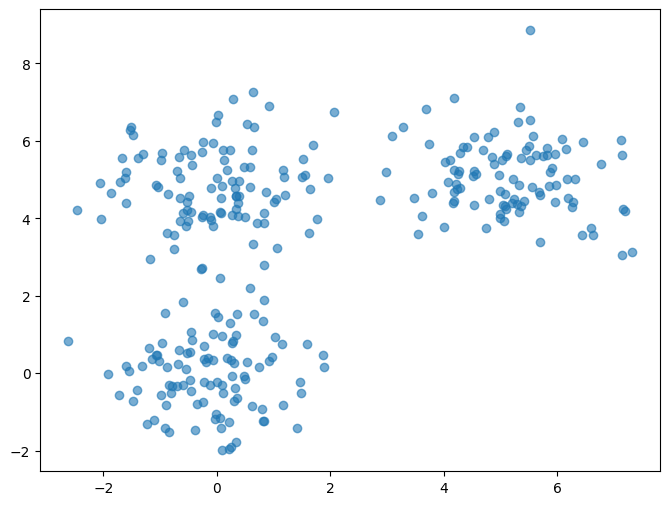

In [11]:
np.random.seed(42)
X1 = np.random.randn(100, 2) + np.array([0, 0])
X2 = np.random.randn(100, 2) + np.array([5, 5])
X3 = np.random.randn(100, 2) + np.array([0, 5])
X = np.vstack((X1, X2, X3))



# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], cmap='viridis', alpha=0.6)

Convergence reached at iteration 5


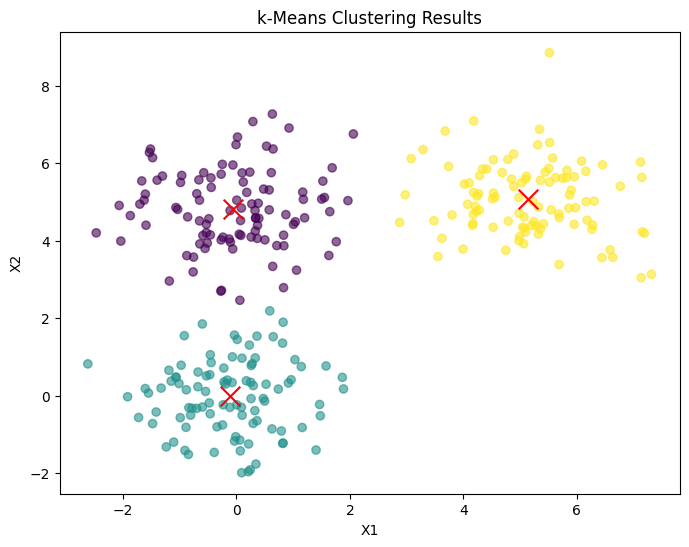

In [13]:

import numpy as np
import matplotlib.pyplot as plt

def initialize_centroids(X, k):
    """Randomly initialize k centroids from the dataset X."""
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    """Assign each point in X to the nearest centroid."""
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """Recalculate centroids as the mean of all points assigned to each centroid."""
    new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
    return new_centroids

def compute_objective(X, centroids, labels):
    """Compute the k-means objective function (sum of squared distances)."""
    return sum(np.linalg.norm(X[labels == j] - centroids[j], axis=1).sum() for j in range(centroids.shape[0]))

def kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        # Compute the change in centroids to check for convergence
        shift = np.linalg.norm(new_centroids - centroids)
        centroids = new_centroids
        if shift < tol:
            print(f"Convergence reached at iteration {i}")
            break
    return centroids, labels

# Example usage with synthetic data
if __name__ == "__main__":
    # Generate synthetic data


    # Run k-means
    k = 3
    centroids, labels = kmeans(X, k)

    # Plot results
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)
    plt.title("k-Means Clustering Results")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()


<ipython-input-10-dab338d7cc53>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis', alpha=0.6)


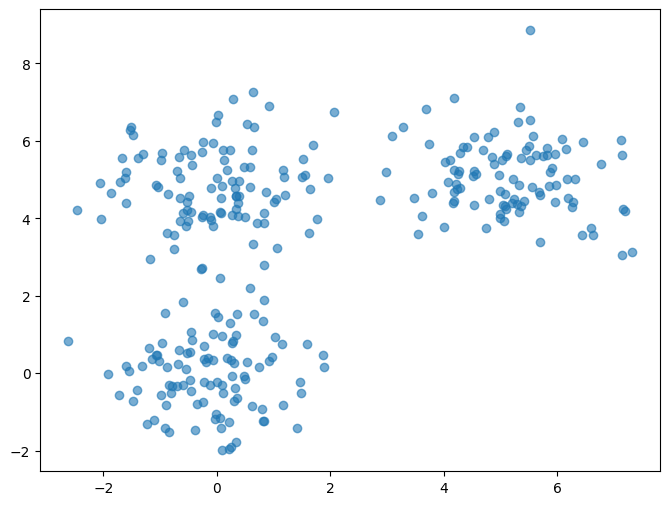

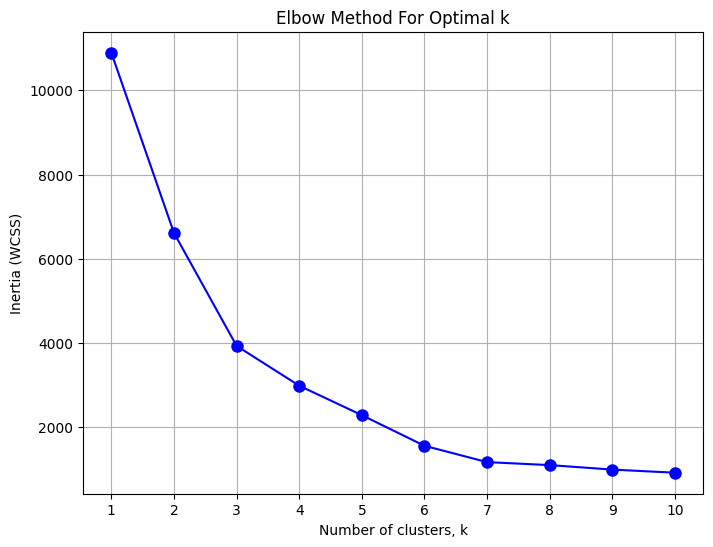

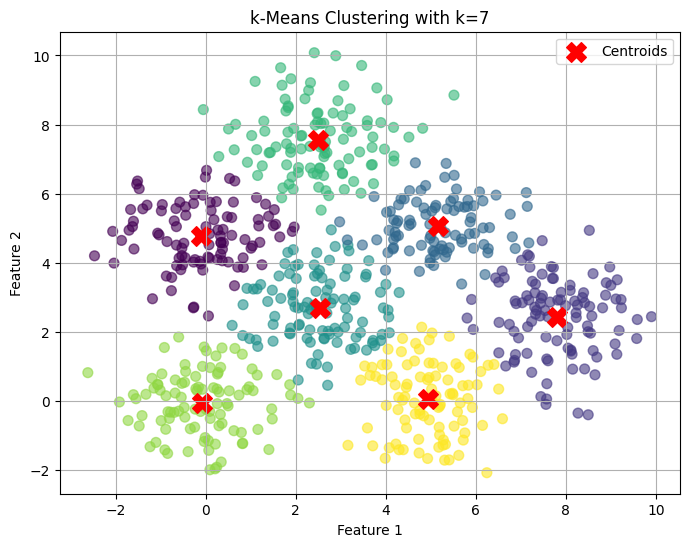

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate synthetic data: here, three groups are generated and then shifted
np.random.seed(42)
X1 = np.random.randn(100, 2) + np.array([0, 0])
X2 = np.random.randn(100, 2) + np.array([5, 5])
X3 = np.random.randn(100, 2) + np.array([0, 5])
X4 = np.random.randn(100, 2) + np.array([5, 0])
X5 = np.random.randn(100, 2) + np.array([2.5, 2.5])
X6 = np.random.randn(100, 2) + np.array([7.5, 2.5])
X7 = np.random.randn(100, 2) + np.array([2.5, 7.5])
X = np.vstack((X1, X2, X3, X4, X5, X6, X7))

# Compute the within-cluster sum of squares (inertia) for a range of clusters
inertias = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, 'bo-', markersize=8)
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Choose k=7 based on the elbow graph (or domain knowledge)
k_final = 7
kmeans_final = KMeans(n_clusters=k_final, init='k-means++', random_state=42)
labels_final = kmeans_final.fit_predict(X)
centroids_final = kmeans_final.cluster_centers_

# Plot the final clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_final, cmap='viridis', alpha=0.6, s=50)
plt.scatter(centroids_final[:, 0], centroids_final[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'k-Means Clustering with k={k_final}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()



# Gaussian Mixture Models (GMMs)

### 1.1. Overview and Motivation

A Gaussian Mixture Model is a probabilistic model that represents a distribution as a weighted sum of several Gaussian (normal) distributions. GMMs are useful for modeling complex data distributions that are not adequately described by a single Gaussian. They are widely used in clustering, density estimation, and pattern recognition.

### 1.2. Mathematical Formulation

Consider a dataset $\{x_1, x_2, \dots, x_N\}$ where each observation $x_i \in \mathbb{R}^d$. A GMM with $K$ components assumes that the data are generated by a mixture of $K$ Gaussian distributions. The probability density function (pdf) is given by

$$
p(x \mid \theta) = \sum_{k=1}^K \pi_k \, \mathcal{N}(x \mid \mu_k, \Sigma_k),
$$

where:

- $\theta = \{\pi_k, \mu_k, \Sigma_k\}_{k=1}^K$ represents the model parameters,
- $\pi_k$ is the mixing coefficient for the $k$th component (with $\pi_k \geq 0$ and $\sum_{k=1}^K \pi_k = 1$),
- $\mu_k$ is the mean vector of the $k$th Gaussian,
- $\Sigma_k$ is the covariance matrix of the $k$th Gaussian, and
- $\mathcal{N}(x \mid \mu_k, \Sigma_k)$ is the multivariate Gaussian density:

$$
\mathcal{N}(x \mid \mu_k, \Sigma_k) = \frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}} \exp\left( -\frac{1}{2}(x-\mu_k)^\top \Sigma_k^{-1}(x-\mu_k) \right).
$$

### 1.3. Latent Variable Interpretation

To simplify estimation, we introduce a latent (hidden) variable $z_i$ for each observation $x_i$ that indicates which component generated the data. Specifically, $z_i$ is a one-hot encoded $K$-dimensional vector with

$$
z_{ik} = \begin{cases}
1, & \text{if } x_i \text{ comes from component } k, \\
0, & \text{otherwise}.
\end{cases}
$$

The complete-data likelihood (if $z_i$ were known) is then

$$
p(x_i, z_i \mid \theta) = \prod_{k=1}^K \left[\pi_k \, \mathcal{N}(x_i \mid \mu_k, \Sigma_k)\right]^{z_{ik}}.
$$

---

## 2. The EM Algorithm for Gaussian Mixture Models

The Expectation-Maximization (EM) algorithm is an iterative procedure to find maximum likelihood estimates of parameters when data are incomplete or have latent variables.

### 2.1. Problem Statement

Given the observed data $\{x_i\}_{i=1}^N$, we wish to maximize the marginal likelihood

$$
\log p(\{x_i\} \mid \theta) = \sum_{i=1}^N \log \left[ \sum_{k=1}^K \pi_k \, \mathcal{N}(x_i \mid \mu_k, \Sigma_k) \right].
$$

Direct maximization is challenging due to the sum inside the logarithm. The EM algorithm circumvents this by iteratively using the latent variable $z_i$.

### 2.2. E-Step (Expectation Step)

At iteration $t$, given the current parameter estimates $\theta^{(t)} = \{\pi_k^{(t)}, \mu_k^{(t)}, \Sigma_k^{(t)}\}$, compute the posterior probabilities (responsibilities) that data point $x_i$ was generated by component $k$:

$$
\gamma(z_{ik}) = p(z_{ik}=1 \mid x_i, \theta^{(t)}) = \frac{\pi_k^{(t)} \, \mathcal{N}(x_i \mid \mu_k^{(t)}, \Sigma_k^{(t)})}{\sum_{j=1}^K \pi_j^{(t)} \, \mathcal{N}(x_i \mid \mu_j^{(t)}, \Sigma_j^{(t)})}.
$$

### 2.3. M-Step (Maximization Step)

Update the parameters by maximizing the expected complete-data log-likelihood with respect to $\theta$:

- **Update Mixing Coefficients:**

  $$
  \pi_k^{(t+1)} = \frac{1}{N} \sum_{i=1}^N \gamma(z_{ik}).
  $$

- **Update Means:**

  $$
  \mu_k^{(t+1)} = \frac{\sum_{i=1}^N \gamma(z_{ik}) \, x_i}{\sum_{i=1}^N \gamma(z_{ik})}.
  $$

- **Update Covariance Matrices:**

  $$
  \Sigma_k^{(t+1)} = \frac{\sum_{i=1}^N \gamma(z_{ik}) \, (x_i - \mu_k^{(t+1)})(x_i - \mu_k^{(t+1)})^\top}{\sum_{i=1}^N \gamma(z_{ik})}.
  $$

### 2.4. Iteration and Convergence

Repeat the E-step and M-step until convergence (i.e., until the change in log-likelihood or parameters is below a predefined threshold). The EM algorithm guarantees that the log-likelihood will not decrease at each iteration.

---




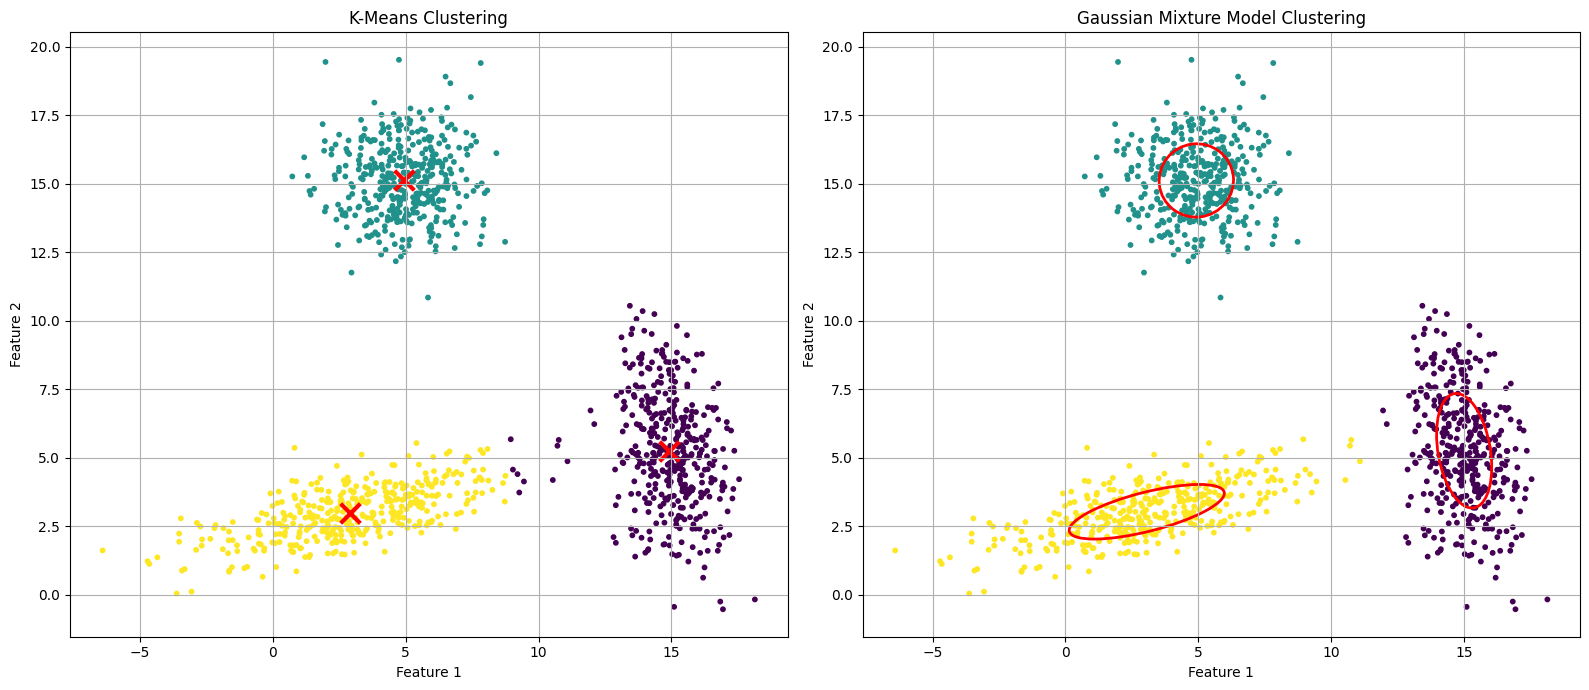

Silhouette Score for K-Means: 0.751
Silhouette Score for GMM: 0.747


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax, **kwargs):
    # Compute eigenvalues and eigenvectors for ellipse orientation and shape
    if covariance.shape == (2, 2):
        U, s, _ = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    # Pass angle as a keyword argument
    ell = Ellipse(position, width, height, angle=angle, **kwargs)
    ax.add_patch(ell)

# Seed for reproducibility
np.random.seed(42)

# Generate synthetic data with clusters that have different shapes and orientations.
n_points = 400

# Cluster 1: elliptical (elongated horizontally)
mean1 = [3, 3]
cov1 = [[9, 2], [2, 1]]  # elongated horizontally
data1 = np.random.multivariate_normal(mean1, cov1, n_points)

# Cluster 2: elliptical (elongated vertically)
mean2 = [15, 5]
cov2 = [[1, -0.8], [-0.8, 5]]  # elongated vertically
data2 = np.random.multivariate_normal(mean2, cov2, n_points)

# Cluster 3: nearly circular
mean3 = [5, 15]
cov3 = [[2, 0], [0, 2]]
data3 = np.random.multivariate_normal(mean3, cov3, n_points)

# Combine data
X = np.vstack((data1, data2, data3))
k = 3  # number of clusters

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
labels_gmm = gmm.fit_predict(X)

# Plot results for K-Means
fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis', s=10)
ax[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
              marker='x', color='red', s=200, linewidths=3)
ax[0].set_title('K-Means Clustering')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
ax[0].grid(True)

# Plot results for GMM with covariance ellipses
ax[1].scatter(X[:, 0], X[:, 1], c=labels_gmm, cmap='viridis', s=10)
ax[1].set_title('Gaussian Mixture Model Clustering')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
ax[1].grid(True)

# Draw GMM ellipses for each component
for i in range(k):
    draw_ellipse(gmm.means_[i], gmm.covariances_[i], ax[1], edgecolor='red', fc='None', lw=2)

plt.tight_layout()
plt.show()

# Optionally, compute silhouette scores
from sklearn.metrics import silhouette_score
print("Silhouette Score for K-Means: {:.3f}".format(silhouette_score(X, labels_kmeans)))
print("Silhouette Score for GMM: {:.3f}".format(silhouette_score(X, labels_gmm)))


# EM Algorithm for the General Case

## 1. Overview

In many problems, we observe data $X$ while some variables $Z$ remain latent (or missing). The complete-data likelihood is $p(X, Z \mid \theta)$, and our goal is to maximize the incomplete-data (observed) log-likelihood:

$$
\ell(\theta) = \log p(X \mid \theta) = \log \sum_Z p(X, Z \mid \theta).
$$

Because directly maximizing $\ell(\theta)$ is often difficult (due to the sum inside the logarithm), the Expectation-Maximization (EM) algorithm is used. EM iteratively optimizes a surrogate function by alternating between an expectation (E) step and a maximization (M) step.

---

## 2. Decomposing the Log-Likelihood

Let $q(Z)$ be any distribution over the latent variables. We can write the observed-data log-likelihood as

$$
\ell(\theta) = \log p(X \mid \theta) = \log \sum_Z q(Z) \frac{p(X, Z \mid \theta)}{q(Z)}.
$$




   $$
   \sum_Z q(Z) \log \frac{p(Z \mid X, \theta)}{q(Z)}
   = \sum_Z q(Z) \left[\log p(X, Z \mid \theta) - \log p(X \mid \theta) - \log q(Z) \right].
   $$

Rearranging, we obtain:

   $$
   \ell(\theta) = \log p(X \mid \theta)
   = \sum_Z q(Z) \log \frac{p(X, Z \mid \theta)}{q(Z)}
   + \mathrm{KL}\left(q(Z) \,\|\, p(Z \mid X, \theta)\right).
   $$

Recognize that the first term is $\mathcal{F}(q, \theta)$.

Thus, we have

$$
\ell(\theta) = \mathcal{F}(q, \theta) + \mathrm{KL}\left(q(Z) \,\|\, p(Z \mid X, \theta)\right).
$$

Since the KL divergence is always non-negative and zero only when $q(Z)=p(Z\mid X,\theta)$, the lower bound $\mathcal{F}(q, \theta)$ is tight when we set

$$
q(Z) = p(Z \mid X, \theta).
$$


also

$$
Q(\theta \mid \theta^{(t)}) \triangleq \mathbb{E}_{Z \mid X, \theta^{(t)}}\left[\log p(X, Z \mid \theta)\right],
$$

and note that the lower bound can be written as

$$
\mathcal{F}(q, \theta) = Q(\theta \mid \theta^{(t)}) + H\left(q(Z)\right),
$$

where the entropy is

$$
H(q) = -\sum_Z q(Z) \log q(Z).
$$

Since the entropy term $H(q)$ does not depend on $\theta$ (when $q(Z)$ is fixed to $p(Z \mid X,\theta^{(t)})$), maximizing $\mathcal{F}(q, \theta)$ with respect to $\theta$ is equivalent to maximizing $Q(\theta \mid \theta^{(t)})$.


---

## The EM Algorithm Steps

With the decomposition in hand, the EM algorithm proceeds as follows:

### E-Step (Expectation):

- **Set $q(Z) = p(Z \mid X, \theta^{(t)})$.**  
  This makes the KL divergence term vanish at $\theta=\theta^{(t)}$ and tightens the lower bound:

  $$
  \ell(\theta^{(t)}) = \mathcal{F}\left(p(Z\mid X,\theta^{(t)}), \theta^{(t)}\right).
  $$

### M-Step (Maximization):

- **Maximize the bound $\mathcal{F}(q, \theta)$ with respect to $\theta$:**

  $$
  \theta^{(t+1)} = \arg\max_\theta \mathcal{F}\left(p(Z \mid X, \theta^{(t)}), \theta\right).
  $$

  Because $\mathcal{F}(q,\theta) = Q(\theta\mid\theta^{(t)}) + \text{constant}$ (with respect to $\theta$), this is equivalent to maximizing:

  $$
  Q(\theta\mid\theta^{(t)}) = \sum_Z p(Z\mid X, \theta^{(t)})\log p(X,Z\mid\theta).
  $$

### Convergence Guarantee:

At each iteration, we have

$$
\ell(\theta^{(t+1)}) \ge \mathcal{F}\left(p(Z \mid X, \theta^{(t)}), \theta^{(t+1)}\right) \ge \mathcal{F}\left(p(Z \mid X, \theta^{(t)}), \theta^{(t)}\right) = \ell(\theta^{(t)}),
$$

which shows that the observed-data log-likelihood is non-decreasing. Under regularity conditions, this monotonic improvement leads to convergence (to a local maximum or saddle point).

---
